In [1]:
import pandas as pd
import numpy as np

# Meet and greet

In [2]:
import os 
print(os.listdir('./data'))

['test.csv', 'train.csv', 'gender_submission.csv']


In [3]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [4]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [5]:
test_df.columns.values

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Data Dictionary
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

**Categorial features:**
* PassengerId
* Survived
* Pclass (ordinal)
* Sex
* Cabin
* Embarked

**Continuous/discrete features:**
* Age
* Fare
* SibSp
* Parch

In [8]:
import matplotlib.pyplot as plt

In [9]:
def plot_feature_hist(values, label):
    plt.hist(values, edgecolor='black', linewidth=1.2)
    plt.title(label)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

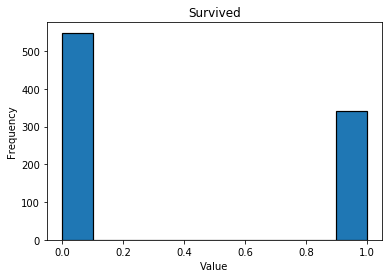

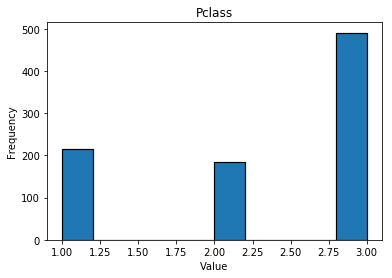

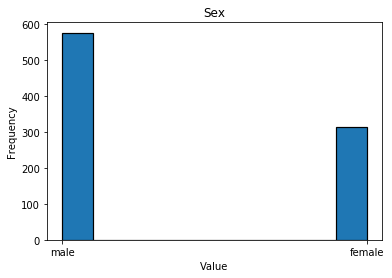

/anaconda3/envs/keras/lib/python3.6/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/keras/lib/python3.6/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


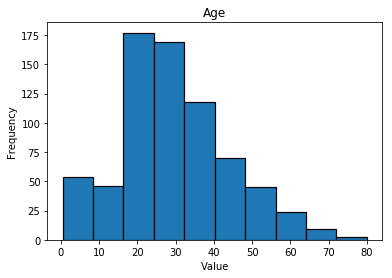

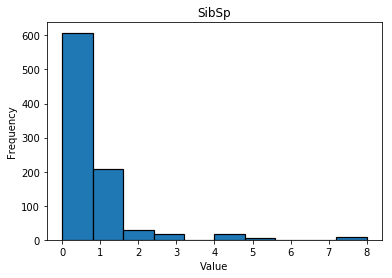

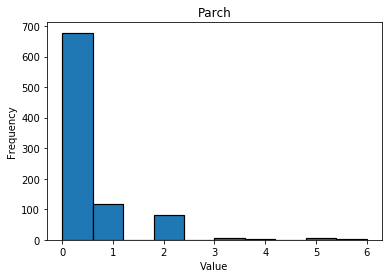

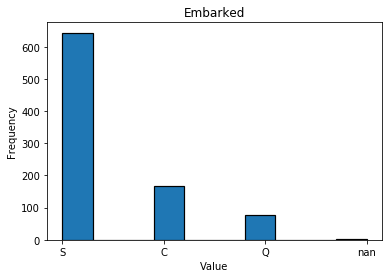

In [10]:
features = ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Embarked"]
for feature in features:
    plot_feature_hist(train_df[feature].values.tolist(), label=feature)

Text(0, 0.5, 'Fare ($)')

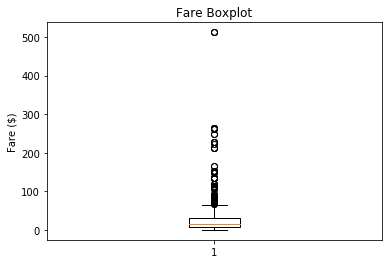

In [11]:
plt.boxplot(x=train_df['Fare'], showmeans = False, meanline = False)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

In [12]:
len(train_df['Fare'][train_df['Fare'] < 10])

336

In [13]:
print('Train columns with null values:\n', train_df.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', test_df.isnull().sum())
print("-"*10)

train_df.describe(include = 'all')

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Minahan, Dr. William Edward",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [14]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Passenger of higher socio-econmic class have better survival ratios.

In [15]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Female passengers had much better survival rate than males. 

In [16]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


# Features engineering

In [17]:
def complete_missing_data(df, feature_dict):
    for feature in feature_dict:
        # complete missing age with median
        if feature_dict[feature] == 'median':
            df[feature].fillna(df[feature].median(), inplace = True)
        elif feature_dict[feature] == 'frequent':
            df[feature].fillna(df[feature].mode()[0], inplace = True)
        else:
            df[feature].fillna(feature_dict[feature], inplace = True)
            
    return

In [18]:
feature_dict = {"Age": "median", "Embarked": "frequent", "Fare": "median"}
for df in [train_df, test_df]:
    complete_missing_data(df, feature_dict=feature_dict)

In [19]:
print('Train columns with null values:\n', train_df.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', test_df.isnull().sum())
print("-"*10)

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64
----------


In [20]:
for df in [train_df, test_df]:
    df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
    
    df["IsAlone"] = 0
    df["IsAlone"].loc[df["FamilySize"] == 1] = 1
    
    df["Title"] = df["Name"].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

/anaconda3/envs/keras/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [21]:
for df in [train_df, test_df]:
    df['Title'] = df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    
all_df = pd.concat([train_df, test_df], sort=False)

stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
title_names = (all_df['Title'].value_counts() >= stat_min) #this will create a true false series with title name as index

for df in [train_df, test_df]:
    df['Title'] = df['Title'].apply(lambda x: 'Misc' if not title_names.loc[x] else x)
    print(df['Title'].value_counts())
    print("-"*10)

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------
Mr        240
Miss       78
Mrs        72
Master     21
Misc        7
Name: Title, dtype: int64
----------


In [22]:
for df in [train_df, test_df]:
    df['FareBin'] = pd.qcut(df['Fare'], 4)

train_df[['FareBin', 'Survived']].groupby(['FareBin'], as_index=False).mean().sort_values(by='FareBin', ascending=True)

,FareBin,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [23]:
for df in [train_df, test_df]:
    df['AgeBin'] = pd.cut(df['Age'], 5)
    
train_df[['AgeBin', 'Survived']].groupby(['AgeBin'], as_index=False).mean().sort_values(by='AgeBin', ascending=True)

,AgeBin,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
encoder = LabelEncoder()
decoded_features = {'Pclass': None, 'Sex': None, 'Embarked': None, 'Title': None, 'FareBin': 'Fare', 'AgeBin': 'Age'}
for df in [train_df, test_df]:
    for feature in decoded_features:
        feature_name =  feature if decoded_features[feature] is None else decoded_features[feature]
        df[feature_name + 'Code'] = encoder.fit_transform(df[feature])

In [26]:
train_df.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,IsAlone,Title,FareBin,AgeBin,PclassCode,SexCode,EmbarkedCode,TitleCode,FareCode,AgeCode
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,Mr,"(-0.001, 7.91]","(16.336, 32.252]",2,1,2,3,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,Mrs,"(31.0, 512.329]","(32.252, 48.168]",0,0,0,4,3,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,Miss,"(7.91, 14.454]","(16.336, 32.252]",2,0,2,2,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,Mrs,"(31.0, 512.329]","(32.252, 48.168]",0,0,2,4,3,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,Mr,"(7.91, 14.454]","(32.252, 48.168]",2,1,2,3,1,2
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,...,1,Mr,"(7.91, 14.454]","(16.336, 32.252]",2,1,1,3,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,1,Mr,"(31.0, 512.329]","(48.168, 64.084]",0,1,2,3,3,3
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,0,Master,"(14.454, 31.0]","(0.34, 16.336]",2,1,2,0,2,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,0,Mrs,"(7.91, 14.454]","(16.336, 32.252]",2,0,2,4,1,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,0,Mrs,"(14.454, 31.0]","(0.34, 16.336]",1,0,0,4,2,0


In [27]:
dropped_features = ['Fare', 'Cabin', 'PassengerId']
for df in [train_df, test_df]:
    df.drop(dropped_features, axis=1, inplace=True)

# Validation

In [28]:
print('Train columns with null values:\n', train_df.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', test_df.isnull().sum())
print("-"*10)

train_df.describe(include = 'all')

Train columns with null values:
 Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Embarked        0
FamilySize      0
IsAlone         0
Title           0
FareBin         0
AgeBin          0
PclassCode      0
SexCode         0
EmbarkedCode    0
TitleCode       0
FareCode        0
AgeCode         0
dtype: int64
----------
Test/Validation columns with null values:
 Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Embarked        0
FamilySize      0
IsAlone         0
Title           0
FareBin         0
AgeBin          0
PclassCode      0
SexCode         0
EmbarkedCode    0
TitleCode       0
FareCode        0
AgeCode         0
dtype: int64
----------


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin,PclassCode,SexCode,EmbarkedCode,TitleCode,FareCode,AgeCode
count,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891,891,891,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,3,NaN,NaN,5,4,5,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,"Minahan, Dr. William Edward",male,NaN,NaN,NaN,347082,S,NaN,NaN,Mr,"(7.91, 14.454]","(16.336, 32.252]",NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,646,NaN,NaN,517,224,523,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,NaN,NaN,1.904602,0.602694,NaN,NaN,NaN,1.308642,0.647587,1.536476,2.740741,1.497194,1.290685
std,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,NaN,NaN,1.613459,0.489615,NaN,NaN,NaN,0.836071,0.477990,0.791503,0.896379,1.118156,0.812620
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,1.000000,2.000000,0.500000,1.000000
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,2.000000,1.000000,2.000000,3.000000,1.000000,1.000000
75%,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,2.000000,1.000000,2.000000,3.000000,2.000000,2.000000


# Train model

In [29]:
train_df.columns.values

array(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Embarked', 'FamilySize', 'IsAlone', 'Title', 'FareBin',
       'AgeBin', 'PclassCode', 'SexCode', 'EmbarkedCode', 'TitleCode',
       'FareCode', 'AgeCode'], dtype=object)

In [30]:
X = train_df.drop(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Embarked', 'Title', 'FareBin', 'AgeBin'], axis=1)
X.values


array([[2, 0, 2, ..., 3, 0, 1],
       [2, 0, 0, ..., 4, 3, 2],
       [1, 1, 2, ..., 2, 1, 1],
       ...,
       [4, 0, 2, ..., 2, 2, 1],
       [1, 1, 0, ..., 3, 2, 1],
       [1, 1, 2, ..., 3, 0, 1]])

In [31]:
Y = train_df.iloc[:, 0]
Y = Y.values.reshape((-1, 1))
Y

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
    

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_dev, Y_train, Y_dev = train_test_split(X, Y, test_size = 0.3)

In [34]:
X_train.shape

(623, 8)

In [35]:
Y_train.shape

(623, 1)

In [36]:
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adam
from keras.layers import Dense, Activation, Dropout

Using TensorFlow backend.


In [42]:
def TitanicNN(input_shape):
    """
    Implementation of the popular ResNet50 the following architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """
    
    # Define the input as a tensor with shape input_shape
    layers = [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
    
    model = Sequential(name='TitanicNN')
    
    model.add(Dense(units=layers[0], input_dim=input_shape[1], kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    model.add(Activation(activation='relu'))
    
    for i in range(1, len(layers)):
        model.add(Dense(units=layers[i], kernel_initializer='glorot_uniform', bias_initializer='zeros'))
        model.add(Activation('relu'))
        model.add(Dropout(rate=0.25))
        
    model.add(Dense(units=1, activation='sigmoid', kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    
    
    # Create model
    #m = Model(inputs = X_input, outputs = X, name='TitanicNN')

    return model

In [43]:
model = TitanicNN(input_shape = X_train.shape)

In [44]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
model.fit(x = X_train, y = Y_train, epochs = 30)

Epoch 1/200
623/623 [==============================] - 2s 3ms/step - loss: 0.6658 - acc: 0.5907
Epoch 2/200
623/623 [==============================] - 0s 191us/step - loss: 0.6407 - acc: 0.5987
Epoch 3/200
623/623 [==============================] - 0s 205us/step - loss: 0.5961 - acc: 0.6645
Epoch 4/200
623/623 [==============================] - 0s 215us/step - loss: 0.5755 - acc: 0.7047
Epoch 5/200
623/623 [==============================] - 0s 203us/step - loss: 0.5796 - acc: 0.7512
Epoch 6/200
623/623 [==============================] - 0s 204us/step - loss: 0.5398 - acc: 0.7721
Epoch 7/200
623/623 [==============================] - 0s 205us/step - loss: 0.4991 - acc: 0.8106
Epoch 8/200
623/623 [==============================] - 0s 197us/step - loss: 0.5291 - acc: 0.7881
Epoch 9/200
623/623 [==============================] - 0s 195us/step - loss: 0.5265 - acc: 0.7432
Epoch 10/200
623/623 [==============================] - 0s 218us/step - loss: 0.4976 - acc: 0.7961
Epoch 11/200
623/623 

623/623 [==============================] - 0s 185us/step - loss: 0.4022 - acc: 0.8395
Epoch 84/200
623/623 [==============================] - 0s 197us/step - loss: 0.4069 - acc: 0.8315
Epoch 85/200
623/623 [==============================] - 0s 225us/step - loss: 0.3789 - acc: 0.8443
Epoch 86/200
623/623 [==============================] - 0s 203us/step - loss: 0.4217 - acc: 0.8347
Epoch 87/200
623/623 [==============================] - 0s 208us/step - loss: 0.3887 - acc: 0.8427
Epoch 88/200
623/623 [==============================] - 0s 209us/step - loss: 0.3941 - acc: 0.8395
Epoch 89/200
623/623 [==============================] - 0s 213us/step - loss: 0.3993 - acc: 0.8427
Epoch 90/200
623/623 [==============================] - 0s 227us/step - loss: 0.3851 - acc: 0.8507
Epoch 91/200
623/623 [==============================] - 0s 203us/step - loss: 0.3782 - acc: 0.8523
Epoch 92/200
623/623 [==============================] - 0s 215us/step - loss: 0.3734 - acc: 0.8427
Epoch 93/200
623/623 [=

623/623 [==============================] - 0s 203us/step - loss: 0.3254 - acc: 0.8716
Epoch 166/200
623/623 [==============================] - 0s 197us/step - loss: 0.3314 - acc: 0.8587
Epoch 167/200
623/623 [==============================] - 0s 187us/step - loss: 0.3303 - acc: 0.8636
Epoch 168/200
623/623 [==============================] - 0s 182us/step - loss: 0.3227 - acc: 0.8668
Epoch 169/200
623/623 [==============================] - 0s 181us/step - loss: 0.3262 - acc: 0.8604
Epoch 170/200
623/623 [==============================] - 0s 183us/step - loss: 0.3735 - acc: 0.8523
Epoch 171/200
623/623 [==============================] - 0s 187us/step - loss: 0.3974 - acc: 0.8234
Epoch 172/200
623/623 [==============================] - 0s 182us/step - loss: 0.3705 - acc: 0.8475
Epoch 173/200
623/623 [==============================] - 0s 188us/step - loss: 0.3576 - acc: 0.8523
Epoch 174/200
623/623 [==============================] - 0s 191us/step - loss: 0.3460 - acc: 0.8604
Epoch 175/200


In [46]:
preds = model.evaluate(x = X_dev, y = Y_dev)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

268/268 [==============================] - 0s 961us/step

Loss = 0.9303022391760527
Test Accuracy = 0.8134328358208955


In [47]:
X_test = test_df.drop(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Embarked', 'Title', 'FareBin', 'AgeBin'], axis=1)
X_test.values

array([[1, 1, 2, ..., 3, 0, 2],
       [2, 0, 2, ..., 4, 0, 3],
       [1, 1, 1, ..., 3, 1, 4],
       ...,
       [1, 1, 2, ..., 3, 0, 2],
       [1, 1, 2, ..., 3, 1, 1],
       [3, 0, 2, ..., 0, 2, 1]])

In [51]:
Y_test = model.predict_classes(x=X_test)
Y_test

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
    

In [50]:
Y_test[10]

array([0.14637643], dtype=float32)